In [1]:
import torch
from matplotlib import pyplot as plt
from torch import autocast
# torch.backends.cudnn.enabled = False

from diffusers import StableDiffusionPipeline
from PIL import Image

# Helper functions

In [2]:
def image_grid(imgs, rows, cols):
    # assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))

    return grid

# Load stable diffusion pipeline

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True,
)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

# Run and display diffusion pipeline

In [8]:
prompt = ['justin bieber playing cards', 'selena gomez jumping']

if torch.cuda.is_available():
    with autocast('cuda'):
        torch.cuda.empty_cache()
        results = pipe(prompt, num_inference_steps=50, height=512, width=512)

  0%|          | 0/51 [00:00<?, ?it/s]

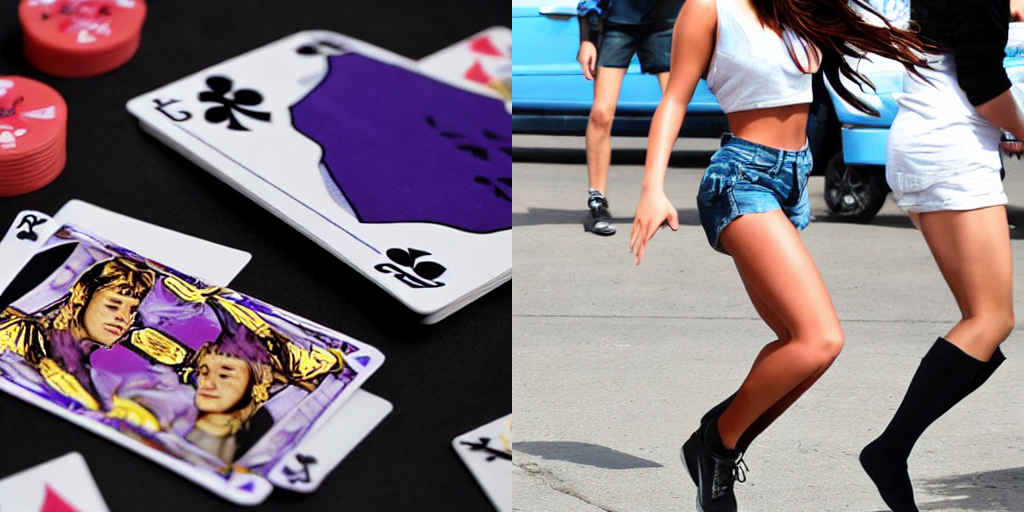

In [9]:
image_grid(results.images, rows=1, cols=2)

# Genrerate multiple different images

In [12]:
prompt = ['pikachu eating dinner at the tokyo tower'] * 5
if torch.cuda.is_available():
    with autocast('cuda'):
        torch.cuda.empty_cache()
        results = pipe(prompt, num_inference_steps=50, height=256, width=256)

  0%|          | 0/51 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


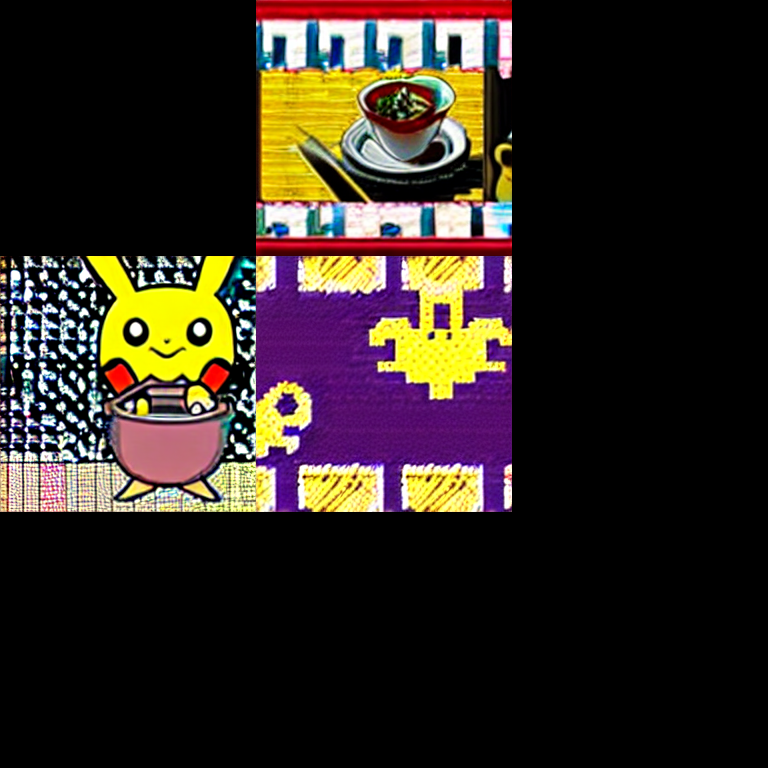

In [13]:
image_grid(results.images, rows=3, cols=3)